<a href="https://colab.research.google.com/github/shameer-phy/ML/blob/main/CaseStudy_Cement/CS_Cement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the libraries and read the dataset

In [2]:
import pandas as pd
import numpy as np


In [3]:
cem_data = pd.read_csv('https://raw.githubusercontent.com/shameer-phy/ML/main/CaseStudy_Cement/Concrete_Data.csv')

In [4]:
cem_data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#CMS is the measure of cement strength and is our target variable. 
#Lets start by doing exploratory analysis, cleaning and pre-processing.

In [5]:
cem_data.shape

(1030, 9)

In [6]:
cem_data.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

#There is no missing data in the dataset

In [7]:
cem_data.head(5)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
cem_data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

#All the variables are taking various numeric values and hence are continuous. Lets study the distribution of data with help of box plots.

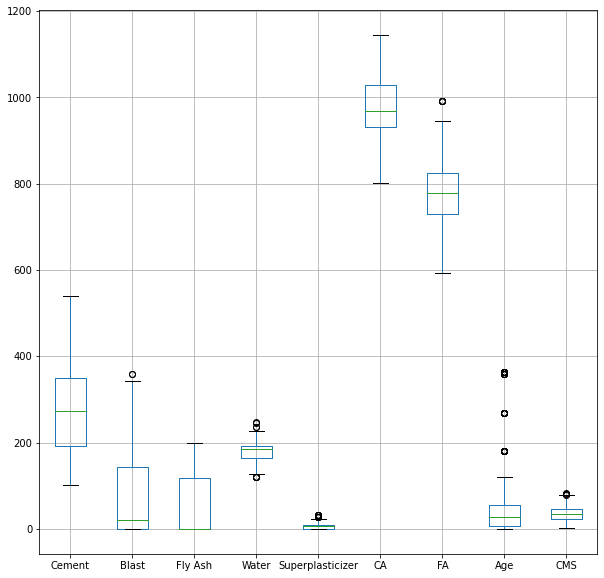

In [70]:
cem_data.boxplot(column=list(cem_data),figsize=(10,10))

#We see that there are outliers. For our ease, in this case let's drop those rows and check the data.

In [85]:
def remove_outliers(df,var):
  q1 = np.percentile(df[var],25)
  q3 = np.percentile(df[var],75)
  IQR = q3-q1
  LW = q1 - (1.5*IQR)
  UW = q3 + (1.5*IQR)
  mask = ((df[var] < LW) | (df[var] > UW))
  df.loc[mask,var] = df[var].median()


In [86]:
cem_data_cc = cem_data.copy()
print(cem_data_cc.shape)

(1030, 9)


In [87]:
cem_data_cc.head()
for x in list(cem_data_cc):
  print(x)
  remove_outliers(cem_data_cc,x)
  print(cem_data_cc.shape)

Cement
(1030, 9)
Blast
(1030, 9)
Fly Ash
(1030, 9)
Water
(1030, 9)
Superplasticizer
(1030, 9)
CA
(1030, 9)
FA
(1030, 9)
Age
(1030, 9)
CMS
(1030, 9)


In [88]:
cem_data_cc.shape

(1030, 9)

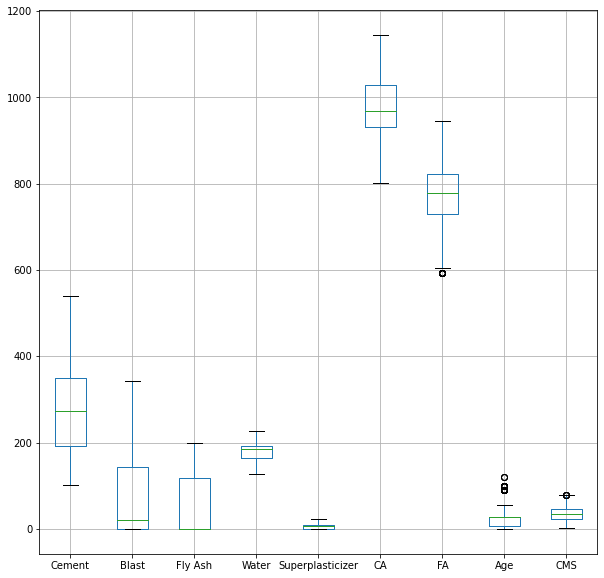

In [89]:
cem_data_cc.boxplot(column=list(cem_data_cc),figsize=(10,10))

#Check the shape of the continuous data

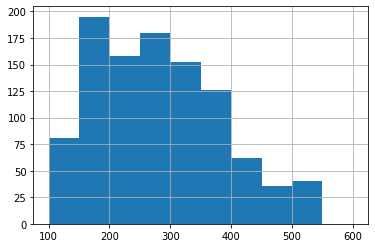

In [111]:
cem_data_cc['Cement'].hist(range=[100,600])

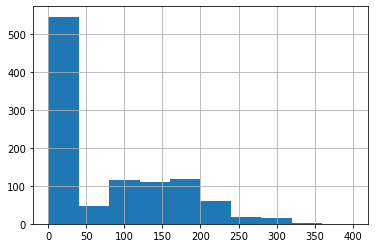

In [110]:
cem_data_cc['Blast'].hist(range=[0,400])

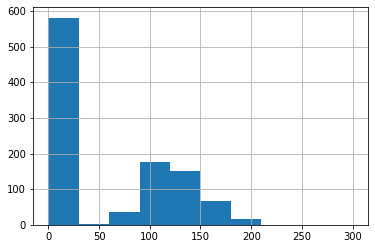

In [109]:
cem_data_cc['Fly Ash'].hist(range=[0,300])

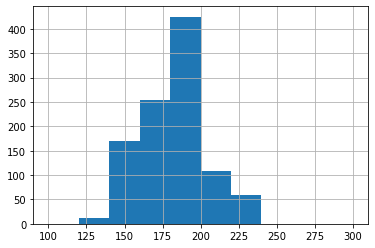

In [108]:
cem_data_cc['Water'].hist(range=[100,300])

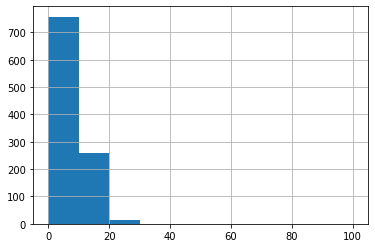

In [112]:
cem_data_cc['Superplasticizer'].hist(range=[0,100])

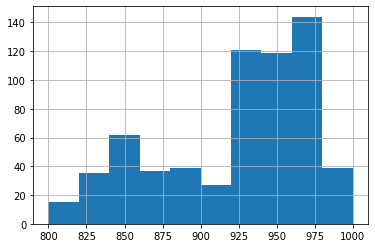

In [107]:
cem_data_cc['CA'].hist(range=[800,1000])

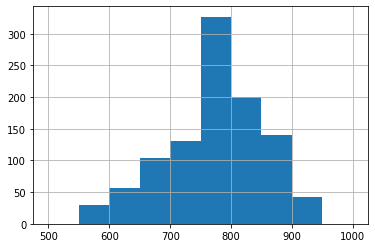

In [113]:
cem_data_cc['FA'].hist(range=[500,1000])

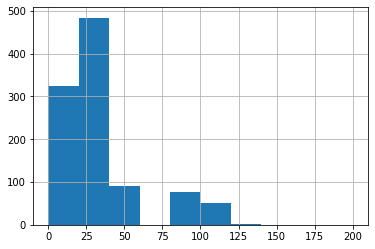

In [114]:
cem_data_cc['Age'].hist(range=[0,200])

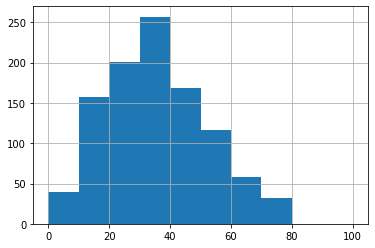

In [115]:
cem_data_cc['CMS'].hist(range=[0,100])